## Interannual analysis of HUC8 basins containing inter-basin transfers

Theodore Barnhart | 29 April 2015

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
import seaborn as sn
from matplotlib.backends.backend_pdf import PdfPages
%matplotlib inline

from statsmodels.sandbox.regression.predstd import wls_prediction_std

/Users/barnhatb/anaconda/lib/python2.7/site-packages/matplotlib/__init__.py:872: UserWarning: axes.color_cycle is deprecated and replaced with axes.prop_cycle; please use the latter.
  warnings.warn(self.msg_depr % (key, alt_key))


In [2]:
data = pd.read_hdf('./WSC_HUC8_budyko.hdf','df')

In [3]:
def huc8int(huc8):
    return int(huc8)

In [4]:
data['huc82'] = data.huc8.map(huc8int)

In [5]:
dataelev = data.groupby(by='idx').mean()

In [6]:
data = data.groupby(by=['huc8','wyears']).mean()

In [7]:
d = data.reset_index()
index = d.groupby(by='huc8').mean().index
mean_wflux = d.groupby(by='huc8').mean().wflux.as_matrix()
mean_R_P = d.groupby(by='huc8').mean().R_P.as_matrix()
sd_wflux = d.groupby(by='huc8').std().wflux.as_matrix()
sd_R_P = d.groupby(by='huc8').std().R_P.as_matrix()
max_wflux = d.loc[d.wyears==1984,'wflux'].as_matrix()
min_wflux = d.loc[d.wyears==2002,'wflux'].as_matrix()
max_R_P = d.loc[d.wyears==1984,'R_P'].as_matrix()
min_R_P = d.loc[d.wyears==2002,'R_P'].as_matrix()

tab = pd.DataFrame({'mean_wflux':mean_wflux,'mean_R_P':mean_R_P,'sd_wflux':sd_wflux,'sd_R_P':sd_R_P,
                   'max_wflux':max_wflux,'min_wflux':min_wflux,'max_R_P':max_R_P,'min_R_P':min_R_P}, index=index)

In [8]:
tab = tab.reset_index()

In [9]:
tab.to_csv('./figures/wsc_huc8_data.csv', index=False,header=True)

In [10]:
for c in tab.columns:
    print c

huc8
max_R_P
max_wflux
mean_R_P
mean_wflux
min_R_P
min_wflux
sd_R_P
sd_wflux


In [11]:
d = data.reset_index()
d.loc[d.wyears==1984,'wflux'].as_matrix()

array([ 2.95823659,  2.47040546,  2.12511186,  2.67817451,  3.37365693,
        2.51985042,  2.11425591,  2.26806705,  2.20128125,  3.68909791,
        3.56672911,  3.29683464,  4.30858295,  3.24841975])

In [12]:
mean_R_P

array([ 0.1396292 ,  0.09424065,  0.04801738,  0.06021275,  0.12058198,
        0.10149181,  0.07643938,  0.0690715 ,  0.08894018,  0.22287333,
        0.20712396,  0.22022589,  0.31183066,  0.12525318])

In [13]:
data.groupby(by='huc82').std().wflux

huc82
10180001    0.394698
10180010    0.304373
10190001    0.233411
10190002    0.325726
10190004    0.427069
10190005    0.408273
10190006    0.382655
10190007    0.328608
11020001    0.286166
14010001    0.454394
14010002    0.447831
14010003    0.529255
14010004    0.604702
14020003    0.370393
Name: wflux, dtype: float64

In [14]:
def budyko(DI):
    return np.sqrt(DI*np.tanh(1/DI)*(1-np.exp(-DI)))
data['PET_P'] = data['PET']/data['P'] # compute the dryness index
data['ET_P'] = data['ET']/data['P'] # compute the evaporative index
DI = np.arange(0,50.001,0.001) # make a range to compute the budyko curve over
EI = budyko(DI) # compute the Budyko Curve
data['pred_EI'] = data['PET_P'].apply(budyko) # compute the predicted evaportative index for each cell given its aridity
data['Q_P'] = 1.-data['ET_P'] # compute actual runoff for each cell 
data['Qpred_P'] = 1.-data['pred_EI'] # compute predicted runoff for each cell
data['Qanom_P'] = data['Q_P']-data['Qpred_P'] # compute the anomoly (actual - predicted)
data['Q'] = data.Q_P*data.P # compute Q not normalized by P
data['Qanom'] = data.Qanom_P*data.P

In [15]:
diversion = pd.read_excel('/Volumes/shareProjects/WSC/data/diversions/Transbasin_Structures_detailed_TBB.xlsx')

In [33]:
len(diversion)

23

In [16]:
diversion

,Priority,From Basin,To Basin,Diversion Name,Allocation,Units,2000 Diversion,1980-2012 Average,wdid,HUC8FromName,HUC8From,HUC8ToName,Huc8To
0,1902,North Platte,South Platte,Michigan Ditch,295.00,CFS,4659,4187.670,4704603,North Platte Headwaters,10180001,Cache La Poudre,10190007
1,1882/1898,North Platte,South Platte,Cameron Pass Ditch,28.00,CFS,84,124.537,4704602,North Platte Headwaters,10180001,Cache La Poudre,10190007
2,1902,North Platte,South Platte,Laramie Pourdre Tunnel,300.00,CFS,5523,14325.400,4800576,Upper Laramie,10180010,Cache La Poudre,10190007
3,1896,North Platte,South Platte,Wilson Supply Ditch,6.15,CFS,1955,1575.820,7600600,Upper Laramie,10180010,Cache La Poudre,10190007
4,1935,Colorado,South Platte,Adams Tunnel,550.00,CFS,247735,232587.000,5104634,Colorado Headwaters,14010001,Big Thompson,10190006
5,1921,Colorado,South Platte,Moffat Tunnel,928.00,CFS,51726,53084.300,5104655,Colorado Headwaters,14010001,St. Vrain,10190005
6,1890,Colorado,South Platte,Grand River Ditch,524.00,CFS,18559,17962.600,5104601,Colorado Headwaters,14010001,Cache La Poudre,10190007
7,1921,Colorado,South Platte,Williams Fork Tunnel,214.00,CFS,2781,4954.260,5104603,Colorado Headwaters,14010001,Clear,10190004
8,-,South Platte,Colorado,Vasquez Tunnel,214.00,CFS,2781,4954.260,5104603,Colorado Headwaters,14010001,Clear,10190004
9,1902,Colorado,South Platte,Berthoud Pass Ditch,53.40,CFS,0,814.675,5104625,Colorado Headwaters,14010001,Clear,10190004


In [17]:
divcode = []
for fhuc8,thuc8 in zip(diversion.HUC8From,diversion.Huc8To):
    divcode.append(str(fhuc8)+'_to_'+str(thuc8))

In [18]:
diversion['divcode'] = divcode

In [19]:
diversion.groupby(by='divcode').sum()['1980-2012 Average'].to_csv('./figures/total_diversion.csv',header=['transfer'])

In [20]:
divs = []
for idx in diversion.index:
    
    name = str(diversion.HUC8From[idx])+':'+str(diversion.Huc8To[idx])
    divs.append(name)

In [21]:
divs = np.unique(divs)

In [22]:
huc8from = []
huc8to = []
huc8fromcode = []
huc8tocode = []

for div in divs:
    
    huc8from.append(int(div.split(':')[0]))
    huc8fromcode.append('Contributing')
    huc8to.append(int(div.split(':')[-1]))
    huc8tocode.append('Receiving')

In [23]:
huc8fromnames=['North Platte Headwaters','Upper Laramie','Colorado Headwaters','Colorado Headwaters','Colorado Headwaters',
               'Colorado Headwaters','Blue','Blue','Blue','Eagle','Roaring Fork','Tomichi']
huc8tonames=['Cache La Poudre','Cache La Poudre','Clear','St. Vrain','Big Thompson','Cache La Poudre','South Platte Headwaters',
             'Upper South Platte','Clear','Arkansas Headwaters','Arkansas Headwaters','Arkansas Headwaters']

In [24]:
divpairs = []
divcode = []
for frm,to,frmhuc,tohuc in zip(huc8fromnames,huc8tonames,huc8from,huc8to):
    divpairs.append(frm+' ('+str(frmhuc)+')'+':'+to+' ('+str(tohuc)+')')
    divcode.append(str(frmhuc)+'_to_'+str(tohuc))

In [25]:
divpairs2 = []
for frm,to in zip(huc8fromnames,huc8tonames):
    divpairs2.append(frm+':'+to)

## Generate a Table of Results for the Transfers

In [26]:
def testslopes(mod1,mod2):
    intercept,X = zip(*mod2.model.data.exog)
    X = np.array(X)
    slope = mod1.params[1]
    inter = mod1.params[0]
    
    preds = slope*X+inter
   
    act = mod2.model.data.endog
    
    tstat,pval,df = sm.stats.ttest_ind(act,preds)
    
    return pval

In [28]:
# generate models

Frommods = []
Tomods = []

Anovas = []

tabcols = ['From_RR_Slope','To_RR_Slope','Ratio','Slopes_Pval','From_Pval','To_Pval', 'From_r2','To_r2','to_int','from_int','divcode']

tab = pd.DataFrame(columns=tabcols,index=divpairs)

xx = 'wflux'
yy = 'R_P'

for frm,to,div,dc in zip(huc8from,huc8to,divpairs,divcode):
    
    X = (data.loc[data.huc82==frm,xx]-data.loc[data.huc82==frm,xx].mean()).as_matrix()
    y = (data.loc[data.huc82==frm,yy]-data.loc[data.huc82==frm,yy].mean()).as_matrix()
    X = sm.add_constant(X)
    mod1 = sm.OLS(y,X).fit()
    Frommods.append(mod1)
    
    X = (data.loc[data.huc82==to,xx]-data.loc[data.huc82==to,xx].mean()).as_matrix()
    y = (data.loc[data.huc82==to,yy]-data.loc[data.huc82==to,yy].mean()).as_matrix()
    X = sm.add_constant(X)
    mod2 = sm.OLS(y,X).fit()
    Tomods.append(mod2)
        
    an = sm.stats.anova_lm(mod2,mod1)
    
    Anovas.append(an)
    
    tab.loc[div,'From_RR_Slope'] = round(mod1.params[1],3)
    tab.loc[div,'To_RR_Slope'] = round(mod2.params[1],3)
    tab.loc[div,'Ratio'] = round(mod1.params[1]/mod2.params[1],3)
    tab.loc[div,'From_Pval'] = mod1.f_pvalue
    tab.loc[div,'To_Pval'] = mod2.f_pvalue
    tab.loc[div,'From_r2'] = round(mod1.rsquared,2)
    tab.loc[div,'To_r2'] = round(mod2.rsquared,2)
    tab.loc[div,'to_int'] = mod2.params[0]
    tab.loc[div,'from_int'] = mod1.params[1]
    tab.loc[div,'Slopes_Pval'] = round(testslopes(mod1,mod2),3)
    tab.loc[div,'divcode'] = dc

In [29]:
tab.loc['Eagle (14010003):Arkansas Headwaters (11020001)'].From_RR_Slope

0.089

In [30]:
# pull the confidence intervals from the models

mod_cis = pd.DataFrame(columns=['to_upper','to_lower','to_slp','from_upper','from_lower','from_slp'], index=divpairs)

#for tomod,frmod,div in zip(Tomods,Frommods,divpairs):
#    tosum = tomod.summary()
#    frsum = frmod.summary()
#    
#    tosum = tosum.tables[1]
#    frsum = frsum.tables[1]
#    
#    toci = tosum.data[-1][-1]
#    frci = frsum.data[-1][-1]
#    
#    mod_cis.loc[div,'to_upper'] = float(toci.split(' ')[-1])
#    mod_cis.loc[div,'to_lower'] = float(toci.split(' ')[3])
#    mod_cis.loc[div,'to_slp'] = tomod.params[-1]
#    
#    mod_cis.loc[div,'from_upper'] = float(frci.split(' ')[-1])
#    mod_cis.loc[div,'from_lower'] = float(frci.split(' ')[4])
#    mod_cis.loc[div,'from_slp'] = frmod.params[-1]

for tomod,frmod,div in zip(Tomods,Frommods,divpairs):
        tosum = tomod.summary()
        frsum = frmod.summary()

        tosum = tosum.tables[1]
        frsum = frsum.tables[1]

        toci = tosum.data[-1][-1]
        frci = frsum.data[-1][-1]

        to_ul = []
        for st in toci.split(' '):
            if st == '':
                continue
            else:
                to_ul.append(float(st))

        fr_ul = []
        for st in frci.split(' '):
            if st == '':
                continue
            else:
                fr_ul.append(float(st))

        mod_cis.loc[div,'to_upper'] = to_ul[-1]
        mod_cis.loc[div,'to_lower'] = to_ul[0]
        mod_cis.loc[div,'to_slp'] = tomod.params[-1]

        mod_cis.loc[div,'from_upper'] = fr_ul[-1]
        mod_cis.loc[div,'from_lower'] = fr_ul[0]
        mod_cis.loc[div,'from_slp'] = frmod.params[-1]

## Table of Results

In [31]:
tab

,From_RR_Slope,To_RR_Slope,Ratio,Slopes_Pval,From_Pval,To_Pval,From_r2,To_r2,to_int,from_int,divcode
North Platte Headwaters (10180001):Cache La Poudre (10190007),0.06,0.023,2.578,1,6.5931e-08,0.00175202,0.38,0.15,-1.37694e-17,0.0596045,10180001_to_10190007
Upper Laramie (10180010):Cache La Poudre (10190007),0.059,0.023,2.554,1,1.06674e-07,0.00175202,0.37,0.15,-1.37694e-17,0.0590582,10180010_to_10190007
Colorado Headwaters (14010001):Clear (10190004),0.049,0.064,0.764,1,5.56084e-05,1.04402e-06,0.24,0.33,2.34188e-17,0.0491162,14010001_to_10190004
Colorado Headwaters (14010001):St. Vrain (10190005),0.049,0.024,2.017,1,5.56084e-05,0.00775403,0.24,0.11,3.46945e-18,0.0491162,14010001_to_10190005
Colorado Headwaters (14010001):Big Thompson (10190006),0.049,0.019,2.641,1,5.56084e-05,0.00199647,0.24,0.15,7.91468e-18,0.0491162,14010001_to_10190006
Colorado Headwaters (14010001):Cache La Poudre (10190007),0.049,0.023,2.124,1,5.56084e-05,0.00175202,0.24,0.15,-1.37694e-17,0.0491162,14010001_to_10190007
Blue (14010002):South Platte Headwaters (10190001),0.049,0.013,3.889,1,0.000204632,0.0948373,0.2,0.05,-1.65883e-17,0.0490098,14010002_to_10190001
Blue (14010002):Upper South Platte (10190002),0.049,0.032,1.553,1,0.000204632,8.98166e-05,0.2,0.22,-1.94614e-17,0.0490098,14010002_to_10190002
Blue (14010002):Clear (10190004),0.049,0.064,0.763,1,0.000204632,1.04402e-06,0.2,0.33,2.34188e-17,0.0490098,14010002_to_10190004
Eagle (14010003):Arkansas Headwaters (11020001),0.089,0.039,2.294,1,2.31779e-12,6.40919e-05,0.56,0.23,2.55872e-17,0.0885514,14010003_to_11020001


**Table 1:** Table illustrating the slope of the Runoff Ratio - Snowmelt Rate equation for the 12 unique intra-basin transfer pairs, this is the sensitivity of the runoff ratio to a unit change in snowmelt rate. $ Ratio = \frac{From RR Slope}{To RR Slope}$, when $>1$ the contributing basin in more sensitive and when $<1$ the recieving basin is more sensitive to a change in snowmelt rate. Overall, this suggests that almost all the contributing basins are more sensitive to a change in snowmelt rate than the recieving basins.

In [97]:
(tab.To_r2+tab.From_r2).idxmax()

'Eagle (14010003):Arkansas Headwaters (11020001)'

In [32]:
tab.to_excel('./figures/WSC_transfers_huc8_table.xls')

In [98]:
names = []

for div,ratio in zip(tab.index,tab.Ratio):
    names.append(div+', Ratio: '+str(ratio))

### Make a data frame for facetting

In [99]:
ct = 0
datnew = pd.DataFrame(columns=['wflux','R_P','huc8','diversion','type'])
for huc1,huc2,Frommod,Tomod,Tocode,Fromcode in zip(huc8from[0:6],huc8to[0:6],Frommods[0:6],Tomods[0:6],huc8tocode,huc8fromcode):
        intercept,X = zip(*Frommod.model.data.exog)
        y = Frommod.model.data.endog
        
        data3=pd.DataFrame({'wflux':X,'R_P':y,'huc8':np.repeat(huc1,len(X)),'type':np.repeat(Fromcode,len(X))})
        
        intercept,X = zip(*Tomod.model.data.exog)
        y = Tomod.model.data.endog
        
        data4=pd.DataFrame({'wflux':X,'R_P':y,'huc8':np.repeat(huc2,len(X)),'type':np.repeat(Tocode,len(X))})
        
        data4 = data4.append(data3)
        
        data4['diversion']=ct
        
        datnew = pd.concat([datnew,data4])        
        ct += 1
        

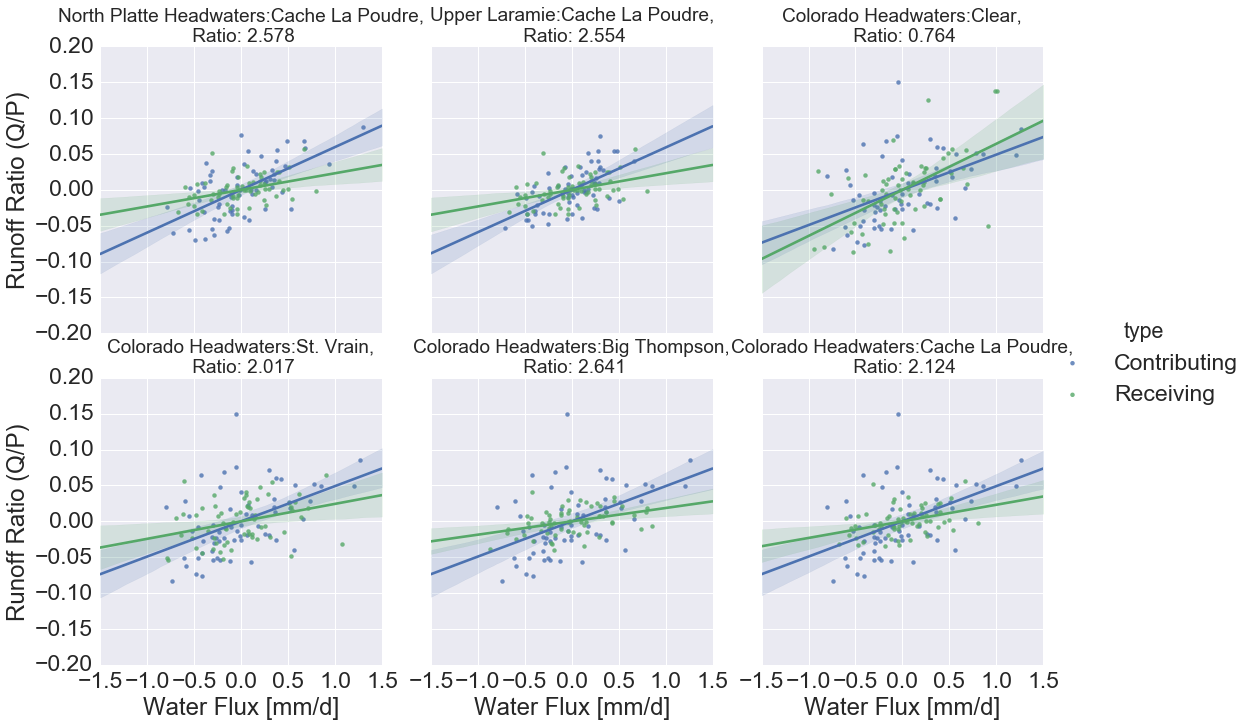

In [100]:
plt.figure(figsize=(10.5,6.5))
sn.set(font_scale=2.3)
names = []

for div,ratio in zip(divpairs2,tab.Ratio):
    names.append(div+',\n Ratio: '+str(ratio))

p = sn.lmplot('wflux','R_P',datnew,hue='type',col='diversion',col_wrap=3,size=5)

for ax,name in zip(p.axes.flat,names):
    ax.set_title(name, fontsize = 19)

    if len(ax.get_ylabel()) > 0:
        ax.set_ylabel('Runoff Ratio (Q/P)', fontsize= 24)
        
    if len(ax.get_xlabel()) > 0:
        ax.set_xlabel('Water Flux [mm/d]',fontsize=24)

plt.savefig('./figures/WSC_transfers_wy_huc8_1_WSC_meeting.png',bbox_inches='tight',dpi=300)

In [101]:
ct = 0
datnew = pd.DataFrame(columns=['wflux','R_P','huc8','diversion','type'])
for huc1,huc2,Frommod,Tomod,Tocode,Fromcode in zip(huc8from[6:],huc8to[6:],Frommods[6:],Tomods[6:],huc8tocode,huc8fromcode):
        intercept,X = zip(*Frommod.model.data.exog)
        y = Frommod.model.data.endog
        
        data3=pd.DataFrame({'sm':X,'R_P':y,'huc8':np.repeat(huc1,len(X)),'type':np.repeat(Fromcode,len(X))})
        
        intercept,X = zip(*Tomod.model.data.exog)
        y = Tomod.model.data.endog
        
        data4=pd.DataFrame({'sm':X,'R_P':y,'huc8':np.repeat(huc2,len(X)),'type':np.repeat(Tocode,len(X))})
        
        data4 = data4.append(data3)
        
        data4['diversion']=ct
        
        datnew = pd.concat([datnew,data4])        
        ct += 1
        

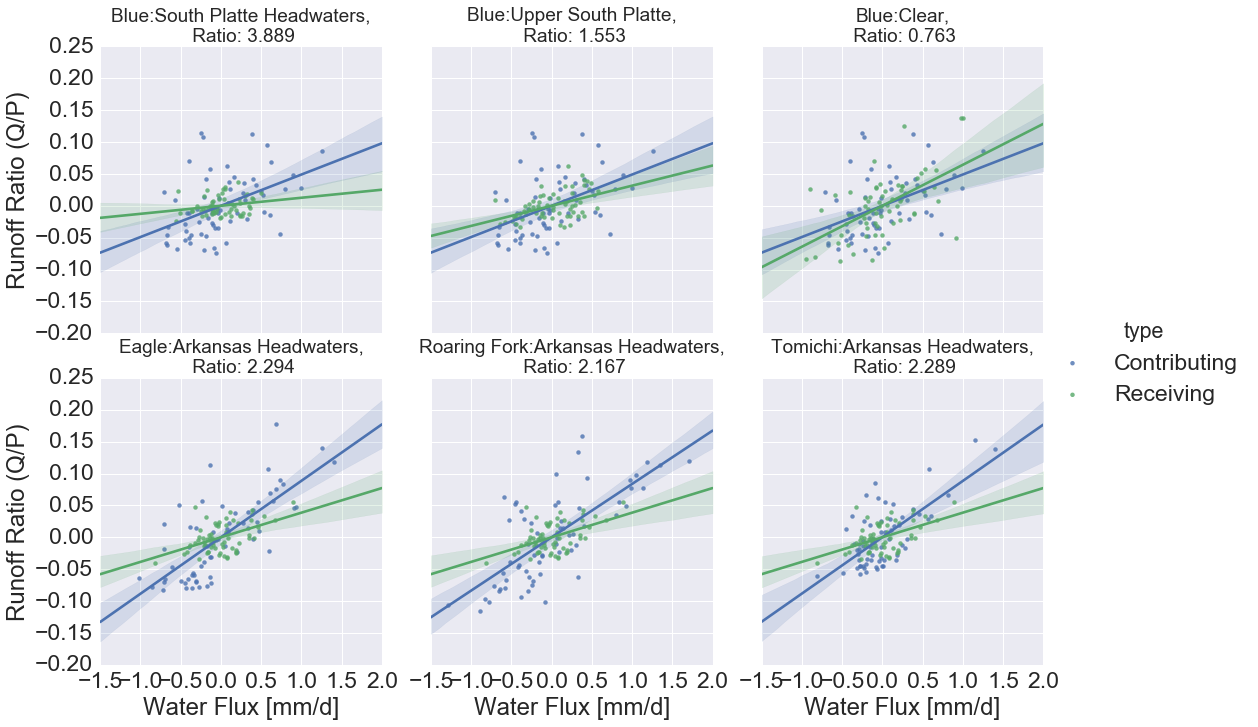

In [102]:
plt.figure(figsize=(10.5,6.5))
sn.set(font_scale=2.3)
names = []

for div,ratio in zip(divpairs2,tab.Ratio):
    names.append(div+',\n Ratio: '+str(ratio))

p = sn.lmplot('sm','R_P',datnew,hue='type',col='diversion',col_wrap=3,size=5)

for ax,name in zip(p.axes.flat,names[6:]):
    ax.set_title(name, fontsize = 19)
    
    if len(ax.get_ylabel()) > 0:
        ax.set_ylabel('Runoff Ratio (Q/P)', fontsize = 24)
        
    if len(ax.get_xlabel()) > 0:
        ax.set_xlabel('Water Flux [mm/d]', fontsize = 24)
    
plt.savefig('./figures/WSC_transfers_wy_huc8_2_WSC_meeting.png',bbox_inches='tight',dpi=300)

In [103]:
tab

,From_RR_Slope,To_RR_Slope,Ratio,Slopes_Pval,From_Pval,To_Pval,From_r2,To_r2,to_int,from_int
North Platte Headwaters (10180001):Cache La Poudre (10190007),0.06,0.023,2.578,1,6.5931e-08,0.00175202,0.38,0.15,-1.37694e-17,0.0596045
Upper Laramie (10180010):Cache La Poudre (10190007),0.059,0.023,2.554,1,1.06674e-07,0.00175202,0.37,0.15,-1.37694e-17,0.0590582
Colorado Headwaters (14010001):Clear (10190004),0.049,0.064,0.764,1,5.56084e-05,1.04402e-06,0.24,0.33,2.34188e-17,0.0491162
Colorado Headwaters (14010001):St. Vrain (10190005),0.049,0.024,2.017,1,5.56084e-05,0.00775403,0.24,0.11,3.46945e-18,0.0491162
Colorado Headwaters (14010001):Big Thompson (10190006),0.049,0.019,2.641,1,5.56084e-05,0.00199647,0.24,0.15,7.91468e-18,0.0491162
Colorado Headwaters (14010001):Cache La Poudre (10190007),0.049,0.023,2.124,1,5.56084e-05,0.00175202,0.24,0.15,-1.37694e-17,0.0491162
Blue (14010002):South Platte Headwaters (10190001),0.049,0.013,3.889,1,0.000204632,0.0948373,0.2,0.05,-1.65883e-17,0.0490098
Blue (14010002):Upper South Platte (10190002),0.049,0.032,1.553,1,0.000204632,8.98166e-05,0.2,0.22,-1.94614e-17,0.0490098
Blue (14010002):Clear (10190004),0.049,0.064,0.763,1,0.000204632,1.04402e-06,0.2,0.33,2.34188e-17,0.0490098
Eagle (14010003):Arkansas Headwaters (11020001),0.089,0.039,2.294,1,2.31779e-12,6.40919e-05,0.56,0.23,2.55872e-17,0.0885514


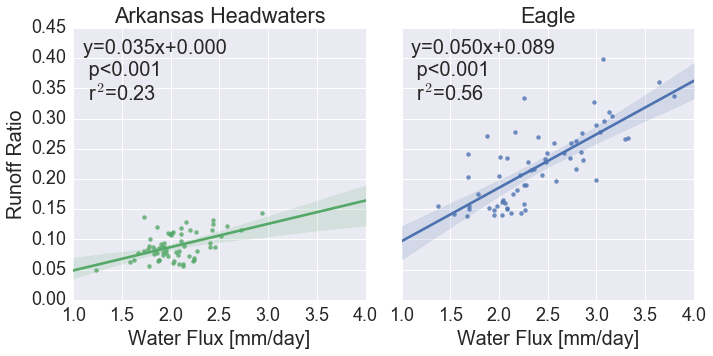

In [107]:
sn.set(font_scale=1.8)
current_palette = sn.color_palette()
cp = [current_palette[1],current_palette[0]]

fig = plt.figure(figsize=(16,8))
p = sn.lmplot('wflux','R_P',data.loc[(data.huc82==11020001) | (data.huc82==14010003)],col='huc82',
              hue='huc82',col_wrap=2,size=5, palette = cp)
ax1 = p.axes.flat[0]
ax2 = p.axes.flat[1]

ax1.set_title('Arkansas Headwaters')
ax2.set_title('Eagle')

ax1.set_ylabel('Runoff Ratio')
ax1.set_xlabel('Water Flux [mm/day]')
ax2.set_xlabel('Water Flux [mm/day]')

eqn1 = 'y=%.3fx+%.3f \n p<0.001 \n r$^2$=%.2f'%(tab.ix[9,'to_slope'],tab.ix[9,'to_int'],tab.ix[9,'To_r2'])
eqn2 = 'y=%.3fx+%.3f \n p<0.001 \n r$^2$=%.2f'%(tab.ix[9,'from_slope'],tab.ix[9,'from_int'],tab.ix[9,'From_r2'])

yloc = 0.33
ax1.text(1.1,yloc,eqn1, fontsize=20)
ax2.text(1.1,yloc,eqn2, fontsize=20)
                       
plt.savefig('./figures/wsc_pi_example_fix.png', bbox_inches='tight', dpi=300)

#11020001
#'Eagle (14010003):Arkansas Headwaters (11020001)'

# Compare Slopes using Confidence Intervals

In [37]:
current_palette = sn.color_palette()

In [38]:
tab

,From_RR_Slope,To_RR_Slope,Ratio,Slopes_Pval,From_Pval,To_Pval,From_r2,To_r2,to_int,from_int
North Platte Headwaters (10180001):Cache La Poudre (10190007),0.06,0.023,2.578,1,6.5931e-08,0.00175202,0.38,0.15,-1.37694e-17,0.0596045
Upper Laramie (10180010):Cache La Poudre (10190007),0.059,0.023,2.554,1,1.06674e-07,0.00175202,0.37,0.15,-1.37694e-17,0.0590582
Colorado Headwaters (14010001):Clear (10190004),0.049,0.064,0.764,1,5.56084e-05,1.04402e-06,0.24,0.33,2.34188e-17,0.0491162
Colorado Headwaters (14010001):St. Vrain (10190005),0.049,0.024,2.017,1,5.56084e-05,0.00775403,0.24,0.11,3.46945e-18,0.0491162
Colorado Headwaters (14010001):Big Thompson (10190006),0.049,0.019,2.641,1,5.56084e-05,0.00199647,0.24,0.15,7.91468e-18,0.0491162
Colorado Headwaters (14010001):Cache La Poudre (10190007),0.049,0.023,2.124,1,5.56084e-05,0.00175202,0.24,0.15,-1.37694e-17,0.0491162
Blue (14010002):South Platte Headwaters (10190001),0.049,0.013,3.889,1,0.000204632,0.0948373,0.2,0.05,-1.65883e-17,0.0490098
Blue (14010002):Upper South Platte (10190002),0.049,0.032,1.553,1,0.000204632,8.98166e-05,0.2,0.22,-1.94614e-17,0.0490098
Blue (14010002):Clear (10190004),0.049,0.064,0.763,1,0.000204632,1.04402e-06,0.2,0.33,2.34188e-17,0.0490098
Eagle (14010003):Arkansas Headwaters (11020001),0.089,0.039,2.294,1,2.31779e-12,6.40919e-05,0.56,0.23,2.55872e-17,0.0885514


In [39]:
def plotslopes(xvar,yvar,title,xlab,printfig,figpath):
    Frommods = []
    Tomods = []

    Anovas = []

    tabcols = ['From_RR_Slope','To_RR_Slope','Ratio','Slopes_Pval','From_Pval','To_Pval', 'From_r2','To_r2']

    tab = pd.DataFrame(columns=tabcols,index=divpairs)
    
    for frm,to,div in zip(huc8from,huc8to,divpairs):
    
        X = (data.loc[data.huc82==frm,xx]-data.loc[data.huc82==frm,xx].mean()).as_matrix()
        y = (data.loc[data.huc82==frm,yy]-data.loc[data.huc82==frm,yy].mean()).as_matrix()
        X = sm.add_constant(X)
        mod1 = sm.OLS(y,X).fit()
        Frommods.append(mod1)

        X = (data.loc[data.huc82==to,xx]-data.loc[data.huc82==to,xx].mean()).as_matrix()
        y = (data.loc[data.huc82==to,yy]-data.loc[data.huc82==to,yy].mean()).as_matrix()
        X = sm.add_constant(X)
        mod2 = sm.OLS(y,X).fit()
        Tomods.append(mod2)

        an = sm.stats.anova_lm(mod2,mod1)

        Anovas.append(an)

        tab.loc[div,'From_RR_Slope'] = round(mod1.params[1],3)
        tab.loc[div,'To_RR_Slope'] = round(mod2.params[1],3)
        tab.loc[div,'Ratio'] = round(mod1.params[1]/mod2.params[1],3)
        tab.loc[div,'From_Pval'] = mod1.f_pvalue
        tab.loc[div,'To_Pval'] = mod2.f_pvalue
        tab.loc[div,'From_r2'] = round(mod1.rsquared,2)
        tab.loc[div,'To_r2'] = round(mod2.rsquared,2)
        tab.loc[div,'Slopes_Pval'] = round(testslopes(mod1,mod2),3)
    
    mod_cis = pd.DataFrame(columns=['to_upper','to_lower','to_slp','from_upper',
                                'from_lower','from_slp','to_r2','from_r2','to_p','from_p'], index=divpairs)
    
    mod_cis = pd.DataFrame(columns=['to_upper','to_lower','to_slp','from_upper',
                                'from_lower','from_slp','to_r2','from_r2','to_p','from_p'], index=divpairs)

    for tomod,frmod,div in zip(Tomods,Frommods,divpairs):
        tosum = tomod.summary()
        frsum = frmod.summary()

        tosum = tosum.tables[1]
        frsum = frsum.tables[1]

        toci = tosum.data[-1][-1]
        frci = frsum.data[-1][-1]

        to_ul = []
        for st in toci.split(' '):
            if st == '':
                continue
            else:
                to_ul.append(float(st))

        fr_ul = []
        for st in frci.split(' '):
            if st == '':
                continue
            else:
                fr_ul.append(float(st))

        mod_cis.loc[div,'to_upper'] = to_ul[-1]
        mod_cis.loc[div,'to_lower'] = to_ul[0]
        mod_cis.loc[div,'to_slp'] = tomod.params[-1]

        mod_cis.loc[div,'from_upper'] = fr_ul[-1]
        mod_cis.loc[div,'from_lower'] = fr_ul[0]
        mod_cis.loc[div,'from_slp'] = frmod.params[-1]
        mod_cis.loc[div,'to_r2'] = tomod.rsquared
        mod_cis.loc[div,'from_r2'] = frmod.rsquared
        mod_cis.loc[div,'to_p'] = tomod.f_pvalue
        mod_cis.loc[div,'from_p'] = frmod.f_pvalue 

    plt.figure(figsize=(6.5,9))
    ct = 2.1
    for c,u,l,p,r in zip(mod_cis.to_slp,mod_cis.to_upper,mod_cis.to_lower,mod_cis.to_p,mod_cis.to_r2):
        p1 = plt.scatter(c,ct,s=60,c=current_palette[1],marker='s')
        plt.hlines(ct,l,u,colors=current_palette[1],lw=2)
        #plt.scatter(p,ct,s=60,marker='*',c=current_palette[1])
        #plt.plot(r,ct,'ob')
        ct += 2


    ct = 1.9
    for c,u,l,p,r in zip(mod_cis.from_slp,mod_cis.from_upper,mod_cis.from_lower,mod_cis.from_p,mod_cis.from_r2):
        p2 = plt.scatter(c,ct,s=60,c=current_palette[0],marker='s')
        plt.hlines(ct,l,u,colors=current_palette[0],lw=2)
        #plt.scatter(p,ct,s=60,marker='*',c=current_palette[0])
        #plt.plot(r,ct,'or')
        ct += 2

    plt.ylim(0,26)

    plt.xlabel(xlab, fontsize=22);
    plt.xticks(fontsize=18);
    p = plt.gca();
    p.set_yticks(np.arange(2,26,2));
    p.set_yticklabels(divpairs2,fontsize=20);
    plt.title(title, fontsize = 22);
    plt.xlim(-0.01,0.12)

    #p1, = plt.plot([-1,-1,-1],'ok')
    p2, = plt.plot([-1,-1,-1],'sk')
    #p3, = plt.plot([-1,-1,-1],'*k')

    #leg = plt.legend([p1,p2,p3], ['r$^2$','Slope','pValue'],loc='lower right', fontsize=14, frameon=True, fancybox=True, shadow=True)
    #leg = plt.legend([p2], ['Slope'],loc='lower right', fontsize=14, frameon=True, fancybox=True, shadow=True)

    #leg.get_frame().set_facecolor('white')
    
    if printfig==True:
        plt.savefig(figpath,bbox_inches='tight',dpi=300)

## Water Flux and Runoff Ratio

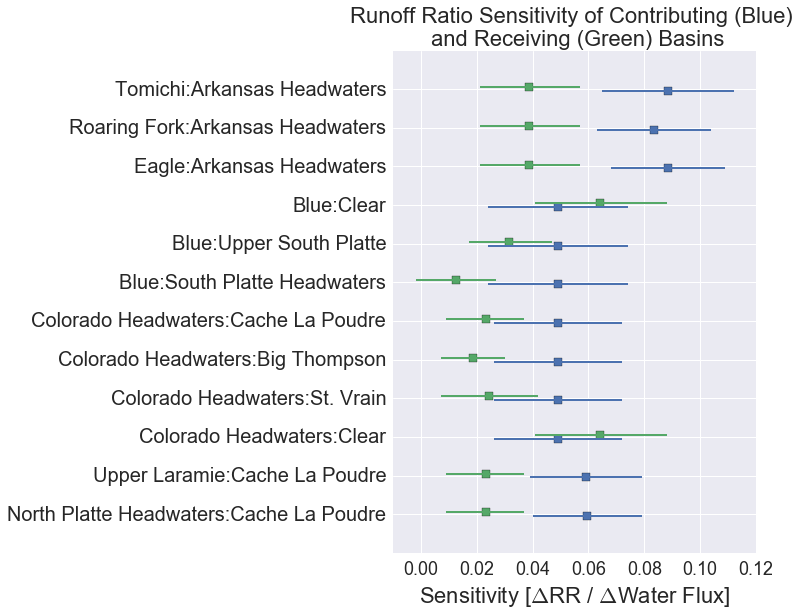

In [41]:
xx = 'wflux'
yy = 'R_P'
title = 'Runoff Ratio Sensitivity of Contributing (Blue) \n and Receiving (Green) Basins'
xlab = 'Sensitivity [$\Delta$RR / $\Delta$Water Flux]'
printfig = True
figpath = './figures/WSC_RR_WF_sensitivity_WSC_meeting.png'
plotslopes(xx,yy,title,xlab,printfig,figpath)

## Snowmelt Rate and Runoff Ratio

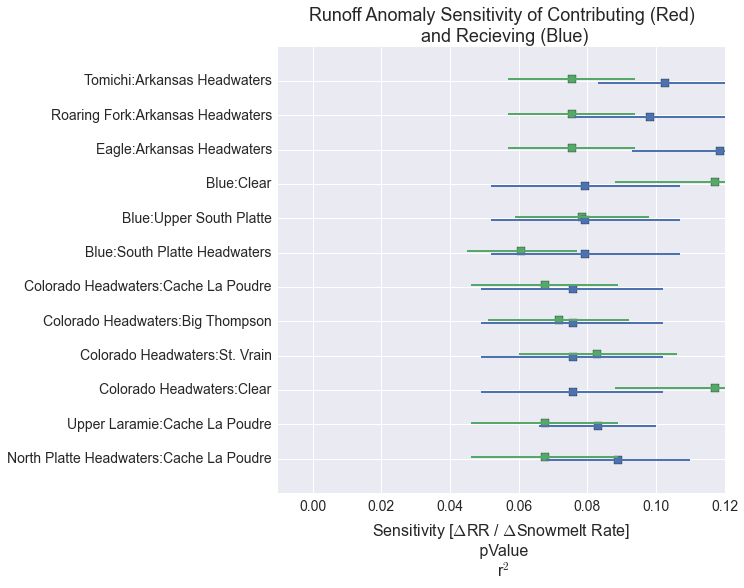

In [87]:
xx = 'sm'
yy = 'R_P'
title = 'Runoff Anomaly Sensitivity of Contributing (Red) \n and Recieving (Blue)'
xlab = 'Sensitivity [$\Delta$RR / $\Delta$Snowmelt Rate] \n pValue \n r$^2$'
printfig = False
figpath = './figures/WSC_RR_SM_sensitivity.pdf'
plotslopes(xx,yy,title,xlab,printfig,figpath)

## Water Flux and Runoff Anomaly

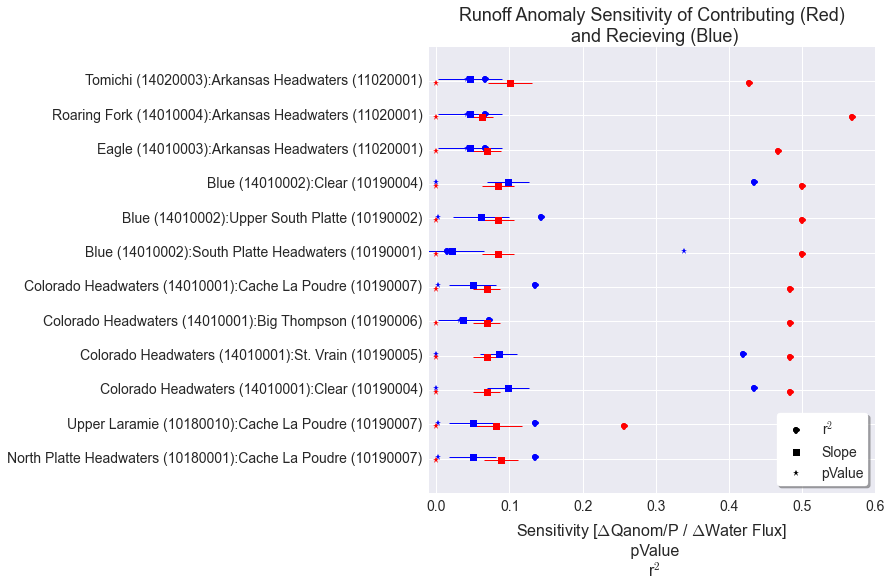

In [26]:
xx = 'wflux'
yy = 'Qanom_P'
title = 'Runoff Anomaly Sensitivity of Contributing (Red) \n and Recieving (Blue)'
xlab = 'Sensitivity [$\Delta$Qanom/P / $\Delta$Water Flux] \n pValue \n r$^2$'
printfig = False
figpath = './figures/WSC_Qanom_P_WF_sensitivity.pdf'
plotslopes(xx,yy,title,xlab,printfig,figpath)

## Snowmelt Rate and Runoff Anomaly

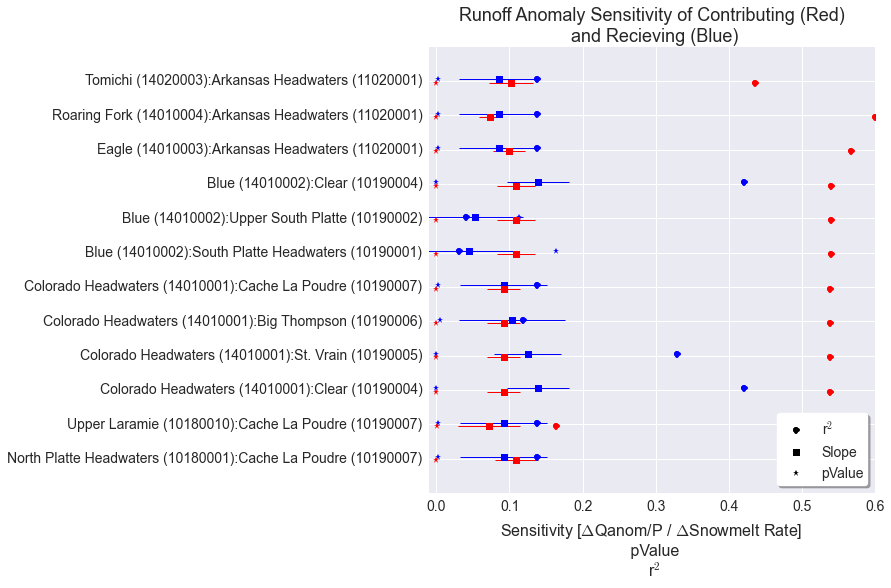

In [27]:
xx = 'sm'
yy = 'Qanom_P'
title = 'Runoff Anomaly Sensitivity of Contributing (Red) \n and Recieving (Blue)'
xlab = 'Sensitivity [$\Delta$Qanom/P / $\Delta$Snowmelt Rate] \n pValue \n r$^2$'
printfig = False
figpath = './figures/WSC_Qanom_P_SM_sensitivity.pdf'
plotslopes(xx,yy,title,xlab,printfig,figpath)

# Make Histograms of Basin Cell Elevations

In [39]:
basindict = {10180001:'North Platte Headwaters', 10180010:'Upper Laramie', 10190001:'South Platte Headwaters',
             10190002:'Upper South Platte', 10190004:'Clear', 10190005:'St. Vrain',
       10190006:'Big Thompson', 10190007:'Cache La Poudre', 11020001:'Arkansas Headwaters', 14010001:'Colorado Headwaters',
       14010002:'Blue', 14010003:'Eagle', 14010004:'Roaring Fork', 14020003:'Tomichi'}

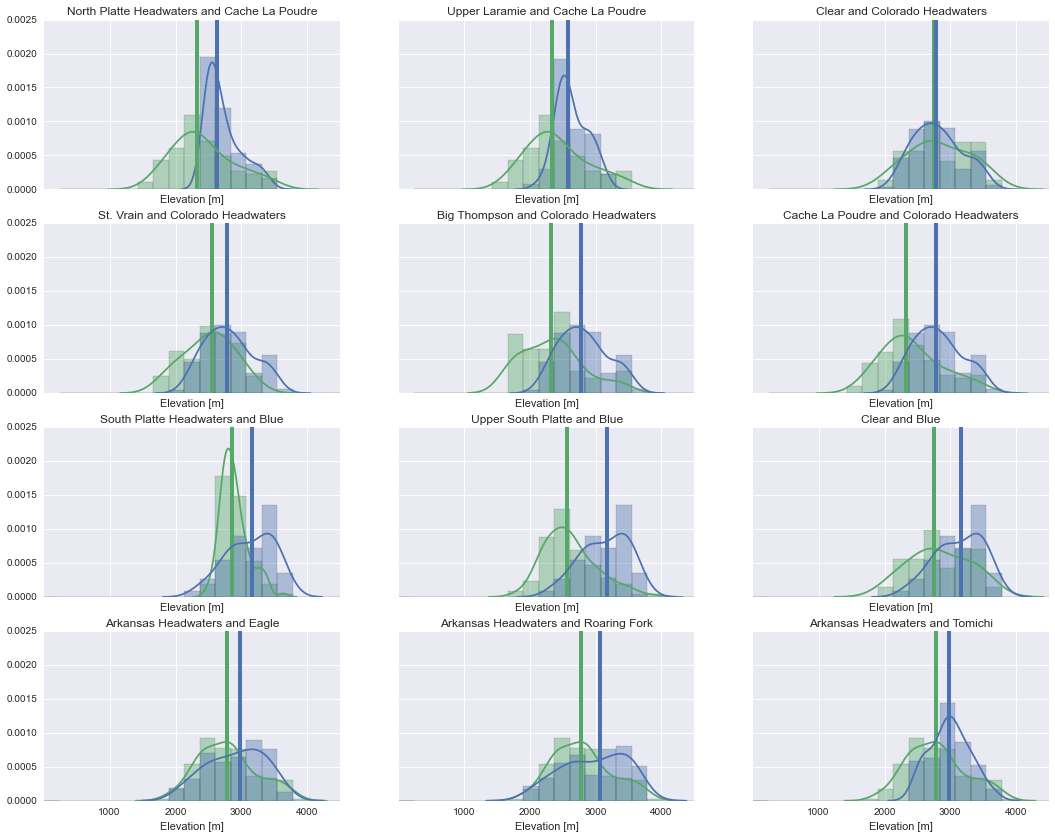

In [44]:
sn.set(font_scale=1.0)
ct = 0
elevnew = pd.DataFrame(columns=['DEMelev','huc82','diversion','type'])
for huc1,huc2,fromcode,tocode in zip(huc8from,huc8to,huc8fromcode,huc8tocode):
        intercept,X = zip(*Frommod.model.data.exog)
        
        data3 = dataelev.loc[dataelev.huc82 == huc1,['DEMelev','huc82']]
        data3['type'] = fromcode
        
        data4 = dataelev.loc[dataelev.huc82 == huc2,['DEMelev','huc82']]
        data4['type'] = tocode
        
        data4 = data4.append(data3)
        
        data4['diversion']=ct
        
        elevnew = pd.concat([elevnew,data4])        
        ct += 1

f,axs = plt.subplots(4, 3, figsize=(18, 14), sharex=True, sharey=True)

axs = axs.reshape(-1)

for d,ax in zip(np.unique(elevnew.diversion),axs):
    
    tmpdat = elevnew.loc[elevnew.diversion==d,:]
    
    ct = 0
    colors = ['dodgerblue','mediumpurple']
    for huc8 in np.unique(tmpdat.huc82):
        
        if tmpdat.loc[tmpdat.huc82==huc8,'type'].unique() == 'Contributing':
            col = current_palette[0]
        else:
            col=current_palette[1]
        
        p = sn.distplot(tmpdat.loc[tmpdat.huc82==huc8,'DEMelev'].as_matrix(),bins=np.linspace(0,4500,20),hist=True,
                        rug=False,ax=ax, color = col)
        p.axvline(tmpdat.loc[tmpdat.huc82==huc8,'DEMelev'].median(),c=col,lw=4)
        ct +=1
        
    h8s = np.unique(tmpdat.huc82)
    title = basindict[h8s[0]]+' and '+basindict[h8s[1]]
    
    p.set_title(title)
    
    p.set_ylim(0,0.0025)
    p.set_xticks([1000, 2000, 3000, 4000])
    
    #huc4 = int(str(huc)[0:4])
    
    #if huc4 == 1401 or huc4 == 1018:
    #    p.set_title(basindict[huc], color='r')

    #else:
    #    p.set_title(basindict[huc], color='b')

    
    p.set_xlabel('Elevation [m]')
    
plt.savefig('./figures/elevation_plots.png',dpi=300,bbox_inches='tight')

In [36]:
tmpdat.type.unique()

array(['Recieving', 'Contributing'], dtype=object)

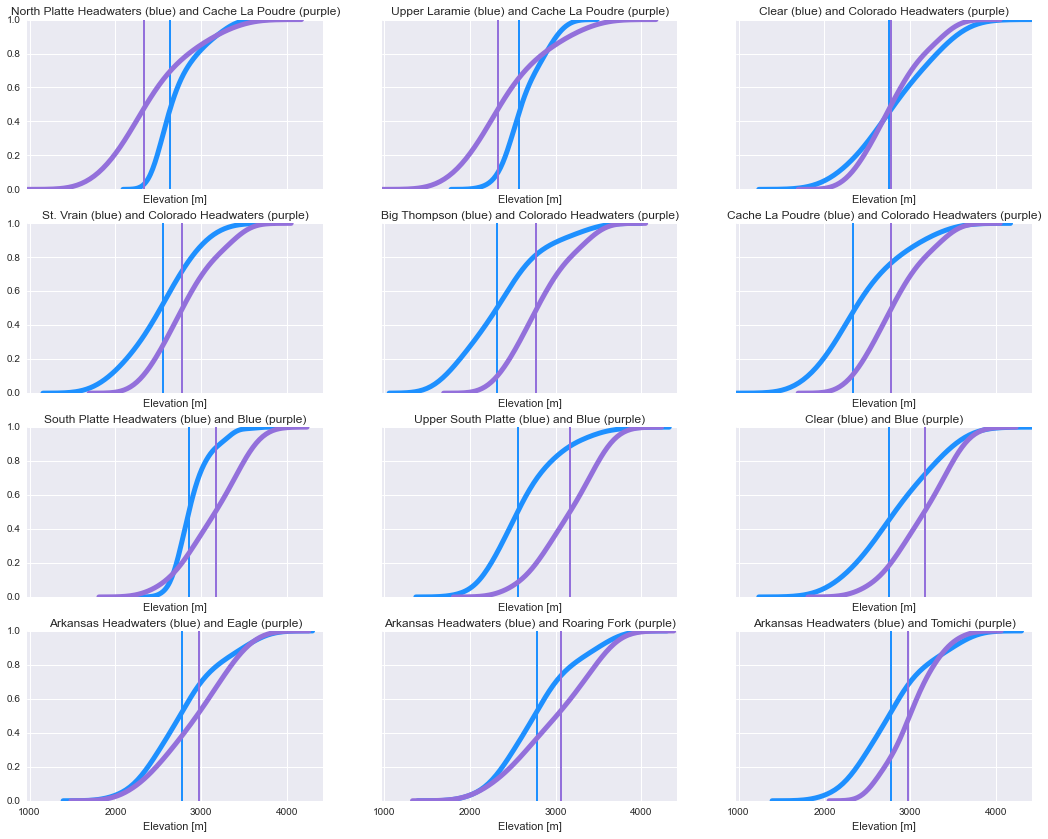

In [71]:
ct = 0
elevnew = pd.DataFrame(columns=['DEMelev','huc82','diversion'])
for huc1,huc2 in zip(huc8from,huc8to):
        intercept,X = zip(*Frommod.model.data.exog)
        
        data3 = dataelev.loc[dataelev.huc82 == huc1,['DEMelev','huc82']]
        
        data4 = dataelev.loc[dataelev.huc82 == huc2,['DEMelev','huc82']]
        
        data4 = data4.append(data3)
        
        data4['diversion']=ct
        
        elevnew = pd.concat([elevnew,data4])        
        ct += 1

f,axs = plt.subplots(4, 3, figsize=(18, 14), sharex=True, sharey=True)

axs = axs.reshape(-1)

for d,ax in zip(np.unique(elevnew.diversion),axs):
    
    tmpdat = elevnew.loc[elevnew.diversion==d,:]
    
    ct = 0
    colors = ['dodgerblue','mediumpurple']
    for huc8 in np.unique(tmpdat.huc82):
        p = sn.kdeplot(tmpdat.loc[tmpdat.huc82==huc8,'DEMelev'].as_matrix(),color = colors[ct], cumulative=True, ax=ax, lw=5)
        p.axvline(tmpdat.loc[tmpdat.huc82==huc8,'DEMelev'].median(),c=colors[ct],lw=2)
        ct +=1
        
    h8s = np.unique(tmpdat.huc82)
    title = basindict[h8s[0]]+' (blue) and '+basindict[h8s[1]]+' (purple)'
    
    p.set_title(title)
    
    #p.set_ylim(0,0.0025)
    p.set_xticks([1000, 2000, 3000, 4000])
    
    #huc4 = int(str(huc)[0:4])
    
    #if huc4 == 1401 or huc4 == 1018:
    #    p.set_title(basindict[huc], color='r')

    #else:
    #    p.set_title(basindict[huc], color='b')

    
    p.set_xlabel('Elevation [m]')

ValueError: min() arg is an empty sequence

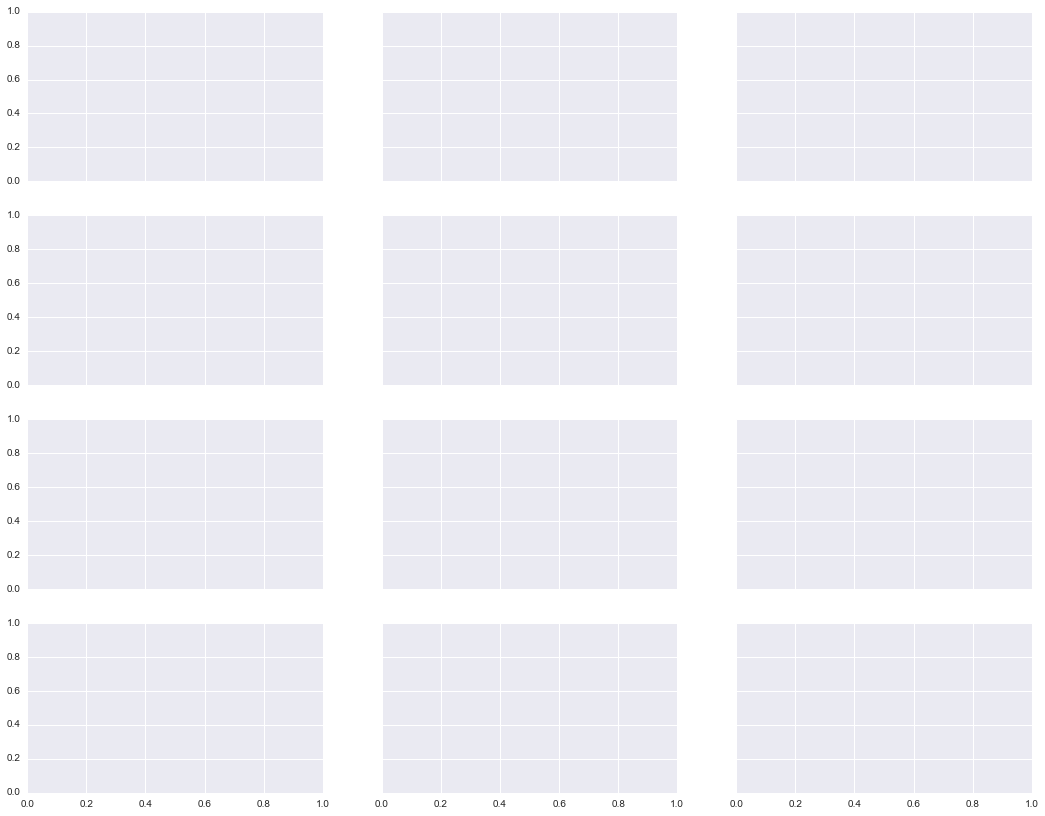

In [83]:
ct = 0
elevnew = pd.DataFrame(columns=['DEMelev','huc82','diversion'])
for huc1,huc2 in zip(huc8from,huc8to):
        intercept,X = zip(*Frommod.model.data.exog)
        
        data3 = dataelev.loc[dataelev.huc82 == huc1,['DEMelev','huc82']]
        
        data4 = dataelev.loc[dataelev.huc82 == huc2,['DEMelev','huc82']]
        
        data4 = data4.append(data3)
        
        data4['diversion']=ct
        
        elevnew = pd.concat([elevnew,data4])        
        ct += 1

f,axs = plt.subplots(4, 3, figsize=(18, 14), sharex=True, sharey=True)

axs = axs.reshape(-1)

for d,ax in zip(np.unique(elevnew.diversion),axs):
    
    tmpdat = elevnew.loc[elevnew.diversion==d,['DEMelev','huc82']]
    
    hucs = tmpdat.huc82.unique()
    
    tmpdat2 = pd.DataFrame({basindict[hucs[0]]:tmpdat.loc[tmpdat.huc82==hucs[0],'DEMelev']})
    
    p = sn.violinplot(tmpdat.loc[tmpdat.huc82==hucs[0],'DEMelev'],tmpdat.loc[tmpdat.huc82==hucs[1],'DEMelev'], ax = ax)
    


137098    10190007
137099    10190007
137903    10190007
137904    10190007
137905    10190007
137906    10190007
137907    10190007
137908    10190007
138706    10190007
138711    10190007
138712    10190007
138713    10190007
138714    10190007
138715    10190007
138716    10190007
...
143656    10190007
143657    10190007
143658    10190007
143659    10190007
143660    10190007
143661    10190007
143662    10190007
143663    10190007
144485    10190007
144486    10190007
144487    10190007
144488    10190007
144489    10190007
145310    10190007
145311    10190007
Name: huc82, Length: 77, dtype: float64

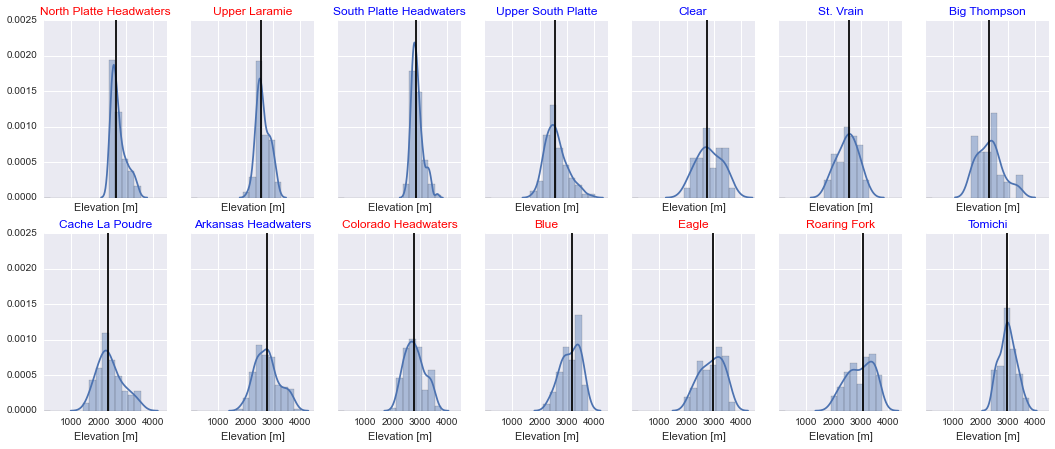

In [40]:
#f,(ax1,ax2,ax3,ax4,ax5,ax6,ax7,ax8,ax9,ax10,ax11,ax12) = plt.subplots(3, 4, figsize=(7, 7), sharex=True)
f,axs = plt.subplots(2, 7, figsize=(18, 7), sharex=True, sharey=True)

axs = axs.reshape(-1)

#axes = [ax1,ax2,ax3,ax4,ax5,ax6,ax7,ax8,ax9,ax10,ax11,ax12]
for huc,ax in zip(np.unique(dataelev.huc82),axs):
    p = sn.distplot(dataelev.loc[dataelev.huc82==huc,'DEMelev'].as_matrix(),bins=np.linspace(0,4500,20), hist=True,  rug=False, ax=ax)
    p.set_ylim(0,0.0025)
    p.set_xticks([1000, 2000, 3000, 4000])
    
    huc4 = int(str(huc)[0:4])
    
    if huc4 == 1401 or huc4 == 1018:
        p.set_title(basindict[huc], color='r')

    else:
        p.set_title(basindict[huc], color='b')
        
    p.axvline(dataelev.loc[dataelev.huc82==huc,'DEMelev'].median(),c='k')
    
    p.set_xlabel('Elevation [m]')

    
    